<a href="https://colab.research.google.com/github/Geeks-Louiz/GoMycode-Exercice/blob/master/TODO_CheckpointANN_completed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
In this practical, we implement and train a feed-forward neural network (also known as an "MLP" for "multi-layer perceptron") on a dataset called "Fashion MNIST", consisting of small greyscale images of items of fashion.

# Learning Objectives

* Understand how to use Keras Layers to build a neural network architecture
* Understand how a model is trained and evaluated
* Understand the concept of train/validation/test split and why it's useful

In [47]:
from __future__ import print_function

import keras

from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D

# Data
In this practical, we use the Fashion MNIST dataset consisting of 70,000 greyscale images and their labels. The dataset is divided
 into 60,000 training images and 10,000 test images. The idea is to train a **classifier** to identify the class value (what type of fashion item it is) given the image. We train and *tune* a model on the 60,000 training images and then evaluate how well it classifies the 10,000 test images that the model did not see during training. This task is an example of a **supervised learning** problem, where we are given both input and labels (targets) to learn from. This is in contrast to **unsupervised learning** where we only have inputs from which to learn patterns or **reinforcement learning** where an agent learns how to maximise a reward signal through interaction with its environment. 

![Texte alternatif…](https://res.cloudinary.com/practicaldev/image/fetch/s---fNWEeWA--/c_imagga_scale,f_auto,fl_progressive,h_420,q_auto,w_1000/https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png)

# Train/Validation/Test Split

When we build machine learning models, the goal is to build a model that will perform well on future data that we have not seen yet. We say that we want our models to be able to generalise well from whatever training data we can collect and do have available, to whatever data we will be applying them to in future. To do this, we split whatever data we have available into a training set, a validation set and a test set. The idea is that we train our model and use the performance on the validation set to make any adjustments to the model and its hyperparameters, but then we report the final accuracy on the test set. The test set (which we never train on), therefore acts as a proxy for our future data.

In [35]:
(train_and_validation_images, train_and_validation_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [36]:
# Construct a validation set from the last 10000 images and labels from 
# train_and_validation_images and train_and_validation_labels
validation_images = train_and_validation_images[-10000:, :, :]
validation_labels = train_and_validation_labels[-10000:]

# Construct a training set from the first 50000 images and labels.
train_images = train_and_validation_images[:50000, :, :]
train_labels = train_and_validation_labels[:50000]

In [37]:
text_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

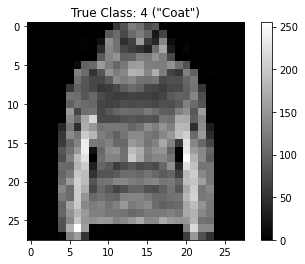

In [38]:
plt.figure()
random_index = np.random.randint(0, len(train_images))
plt.imshow(train_images[random_index], cmap='gray')
plt.colorbar()
numerical_label = train_labels[random_index]
text_description = text_labels[numerical_label]
plt.title('True Class: {} ("{}")'.format(numerical_label, text_description))

plt.gca().grid(False)

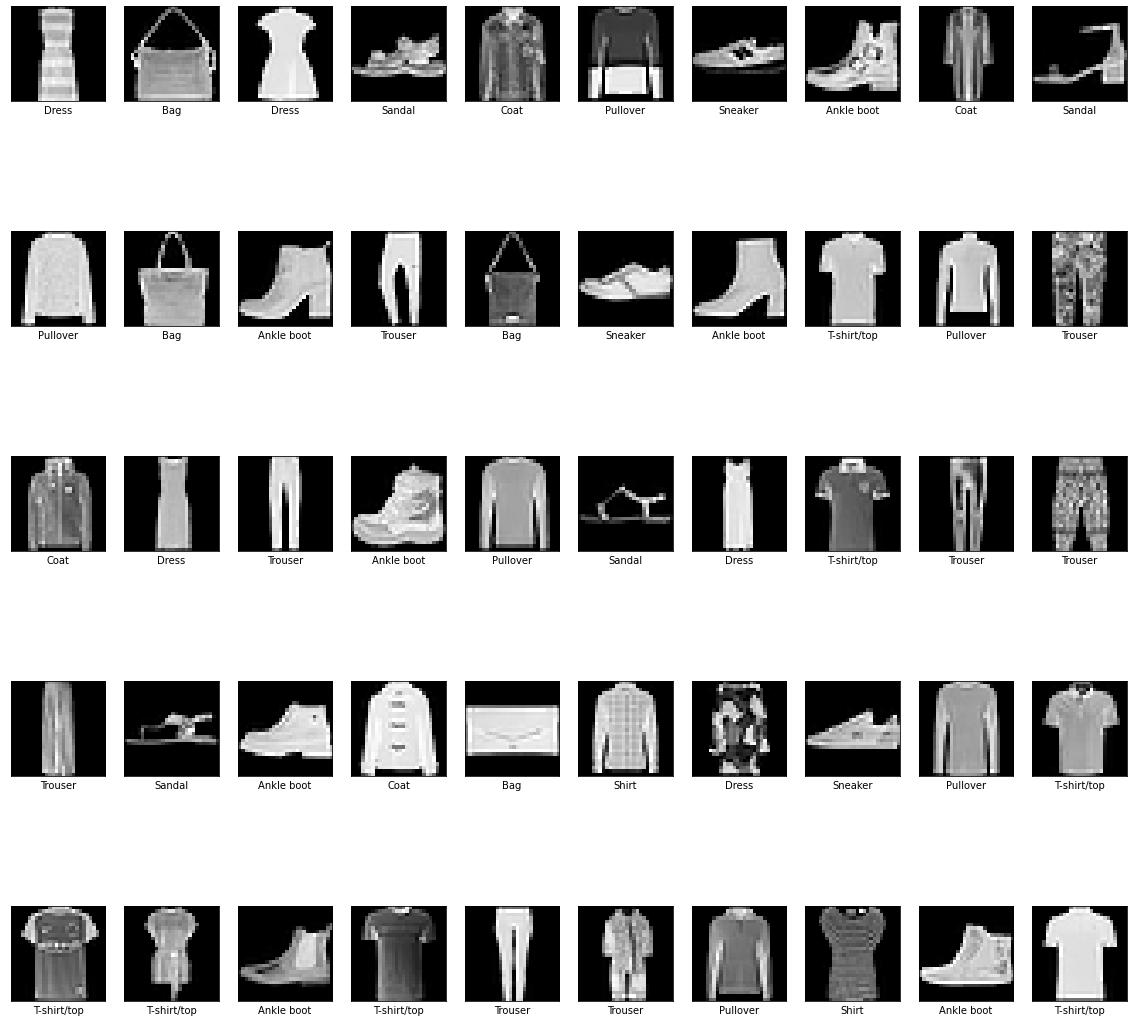

In [39]:
# Another view, showing 50 randomly selected images at a time
plt.figure(figsize=(20,20))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    
    img_index = np.random.randint(0, 50000)
    plt.imshow(train_images[img_index], cmap=plt.cm.gray)
    plt.xlabel(text_labels[train_labels[img_index]])

# Preprocess

In [40]:
# Flatten
train_images_flatten = train_images.reshape(train_images.shape[0], 784)
validation_images_flatten = validation_images.reshape(validation_images.shape[0], 784)
test_images_flatten = test_images.reshape(test_images.shape[0], 784)

In [41]:
# Normalize

train_images_model = train_images_flatten/255.
validation_images_model = validation_images_flatten/255.
test_images_model = test_images_flatten/255.

In [42]:
# convert class vectors to binary class matrices
from tensorflow import keras


train_labels_categ = keras.utils.to_categorical(train_labels, 10)
validation_labels_categ = keras.utils.to_categorical(validation_labels, 10)
test_labels_categ = keras.utils.to_categorical(test_labels, 10)

# Train

In [88]:
batch_size = 128
num_classes = 10
epochs = 40

batch_size = 128
num_classes = 10
epochs = 40
model = tf.keras.Sequential([
    # Convert the 28x28 image into a flat vector of 28x28 = 784 values
    tf.keras.layers.Flatten(input_shape=(28, 28,1), name='flatten_input'),
    # Create a "hidden" layer with 256 neurons and apply the ReLU non-linearity
    tf.keras.layers.Dense(256, activation=tf.nn.relu, name='input_to_hidden1'),
    # Create another hidden layer with 128 neurons
    tf.keras.layers.Dense(128, activation=tf.nn.relu, name='hidden1_to_hidden2'),
    # Create an "output layer" with 10 neurons
    tf.keras.layers.Dense(10, name='hidden_to_logits'),
])

# End Code

In [89]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(train_images_model, train_labels_categ,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(validation_images_model, validation_labels_categ))


Epoch 1/40
391/391 [==============================] - 4s 9ms/step - loss: 11.4135 - accuracy: 0.1910 - val_loss: 12.5157 - val_accuracy: 0.1958
Epoch 2/40
391/391 [==============================] - 3s 8ms/step - loss: 12.4409 - accuracy: 0.1980 - val_loss: 12.5157 - val_accuracy: 0.1958
Epoch 3/40
391/391 [==============================] - 3s 8ms/step - loss: 12.4409 - accuracy: 0.1980 - val_loss: 12.5157 - val_accuracy: 0.1958
Epoch 4/40
391/391 [==============================] - 3s 8ms/step - loss: 12.4409 - accuracy: 0.1980 - val_loss: 12.5157 - val_accuracy: 0.1958
Epoch 5/40
391/391 [==============================] - 3s 8ms/step - loss: 12.4409 - accuracy: 0.1980 - val_loss: 12.5157 - val_accuracy: 0.1958
Epoch 6/40
391/391 [==============================] - 3s 8ms/step - loss: 12.4409 - accuracy: 0.1980 - val_loss: 12.5157 - val_accuracy: 0.1958
Epoch 7/40
391/391 [==============================] - 3s 8ms/step - loss: 12.4409 - accuracy: 0.1980 - val_loss: 12.5157 - val_accuracy:

# Test

In [90]:
score = model.evaluate(test_images_model, test_labels_categ, verbose=0)
print('Test accuracy:', score[1])
# You should be able to get,at least, 88% accuracy

Test accuracy: 0.19269999861717224


In [91]:
test_logits = model.predict(test_images_flatten)

In [92]:
test_logits

array([[ -599.1055 ,   738.0762 ,   619.1813 , ...,   761.87787,
          513.76245,  -845.6674 ],
       [-2297.6963 ,  1487.9905 ,  2069.5815 , ...,  1373.5592 ,
         1402.9794 , -2306.5667 ],
       [-1282.9636 ,   936.3824 ,   855.6095 , ...,   627.6366 ,
          832.712  , -1214.5183 ],
       ...,
       [ -870.9415 ,   648.8816 ,   763.66125, ...,   535.79584,
          545.4503 ,  -866.2873 ],
       [ -926.8869 ,   621.516  ,   668.9396 , ...,   374.95258,
          592.994  ,  -892.4747 ],
       [ -432.30893,   469.4215 ,   465.9305 , ...,   463.16544,
          367.99088,  -577.85834]], dtype=float32)

In [93]:
test_predictions = np.argmax(test_logits, axis=1)


In [94]:
test_predictions

array([7, 2, 1, ..., 2, 2, 1])

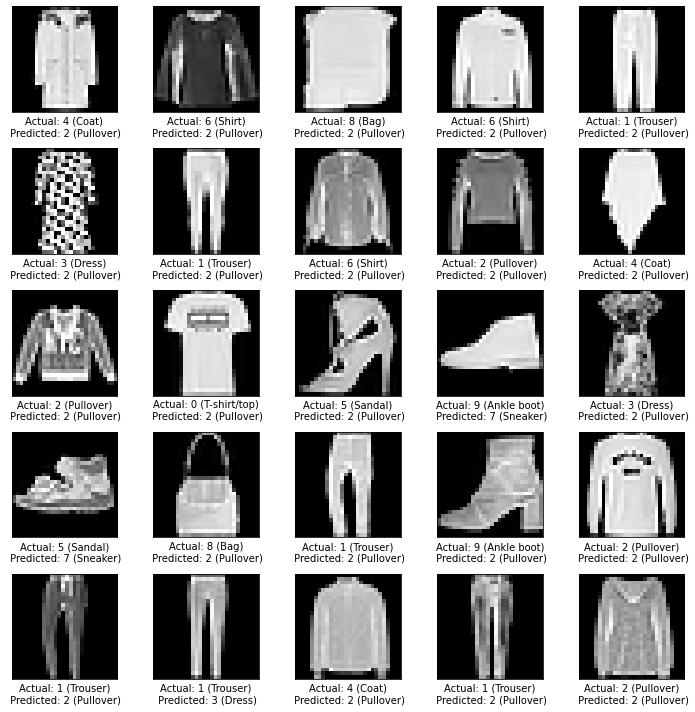

In [97]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    
    img_index = np.random.randint(0, 10000)
    plt.imshow(test_images[img_index], cmap=plt.cm.gray)
    
    actual_label = int(test_labels[img_index])
    predicted_label = int(test_predictions[img_index])
    
    plt.xlabel("Actual: {} ({})\n Predicted: {} ({})".format(
        actual_label, text_labels[actual_label], predicted_label, text_labels[predicted_label]
    ))
    
plt.tight_layout()
plt.show()